### Increased levels CO2 and Nitrogen in the atmosphere, and the impact on biomass
We know that the atmospheric levels of CO2 and Nitrogen is increasing with the climate change. 
- How does this affect the biomass in plants?

We have a hypothesis that uncomsumed soil levels of nitrate are less where there is higher biodiversity

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [158]:
ls datasets/

MS00101_v9.csv
bioCON_plant_diversity.txt
e081_Atmospheric deposition and precipitation.txt
e141_Lupinus Transgenerational Effects.txt
e141_Poa Transgenerational Effects.txt
e141_Schizachyrium Transgenerational Effects.txt
national_parks_biodiversity_parks.csv
national_parks_biodiversity_species.csv
plant_pollinator_diversity_set1.csv
plant_pollinator_diversity_set2.csv
species.txt


In [159]:
bicon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')

In [160]:
bicon.columns

Index(['Year', 'Plot', 'Ring', 'CO2 Treatment', 'Nitrogen Treatment',
       'CountOfSpecies', 'CountOfGroup', 'Experiment', 'monospecies',
       'Monogroup', 'Water Treatment', 'Temp Treatment', 'Depth', 'Carbon(%)',
       'Nitrogen(%)', 'C/N Ratio'],
      dtype='object')

In [161]:
bicon['Depth'].value_counts()

40-60    1409
0-10     1408
10-20    1408
20-40    1408
Name: Depth, dtype: int64

In [162]:
bicon.sample(5)

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
2318,2007,209,4,Camb,Namb,1,1,M,Amorpha canescens,Legume,,,20-40,0.5685,0.0514,11.06031128
2262,2007,195,4,Camb,Nenrich,1,1,M,Koeleria cristata,C-3,,,20-40,0.3215,0.0322,9.98447205
1710,2007,57,1,Cenrich,Namb,1,1,M,Schizachyrium scoparium,C-4,,,20-40,0.322,0.029,11.10344828
233,2002,59,1,Cenrich,Nenrich,4,4,S,,,,,10-20,0.606,0.066,9.181818182
5042,2016,183,3,Cenrich,Nenrich,1,1,M,Poa pratensis,C-3,,,40-60,0.46,0.04,11.5


In [163]:
bicon['Carbon(%)'] = pd.to_numeric(bicon['Carbon(%)'], errors='coerce')
bicon['Nitrogen(%)'] = pd.to_numeric(bicon['Nitrogen(%)'], errors='coerce')

### Nitrogen percentage based on count of species and depth
- We can see that the deeper values have lower Nitrogen values
- We can also see that the slope is similar in the different depths, but the scaling is different

<AxesSubplot:xlabel='CountOfSpecies'>

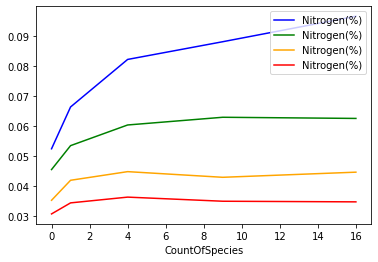

In [164]:
df = bicon.loc[:, ['CountOfSpecies', 'Depth', 'Nitrogen(%)', 'Nitrogen Treatment']].copy()

df['Nitrogen(%)'] = pd.to_numeric(df['Nitrogen(%)'], errors='coerce')
df['CountOfSpecies'] = pd.to_numeric(df['CountOfSpecies'], errors='coerce')

#fig, axes = plt.subplots(nrows=2, ncols=2)

ax = df[(df['Depth'] == '0-10') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(color='blue')
df[(df['Depth'] == '10-20') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='green')
df[(df['Depth'] == '20-40') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='orange')
df[(df['Depth'] == '40-60') & (df['Nitrogen Treatment'] == 'Nenrich')].groupby('CountOfSpecies').mean().plot(ax=ax, color='red')

<AxesSubplot:xlabel='Density', ylabel='Nitrogen(%)'>

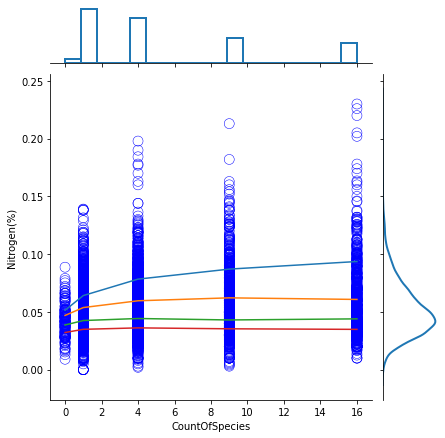

In [165]:
g = sns.JointGrid()
x, y = bicon["CountOfSpecies"], bicon["Nitrogen(%)"]
sns.scatterplot(x=x, y=y, ec='b', fc="none", s=100, linewidth=0.5, ax=g.ax_joint)
sns.lineplot(data=bicon[bicon['Depth'] == '0-10'].groupby('CountOfSpecies')['Nitrogen(%)'].mean(), ax=g.ax_joint)
sns.lineplot(data=bicon[bicon['Depth'] == '10-20'].groupby('CountOfSpecies')['Nitrogen(%)'].mean(), ax=g.ax_joint)
sns.lineplot(data=bicon[bicon['Depth'] == '20-40'].groupby('CountOfSpecies')['Nitrogen(%)'].mean(), ax=g.ax_joint)
sns.lineplot(data=bicon[bicon['Depth'] == '40-60'].groupby('CountOfSpecies')['Nitrogen(%)'].mean(), ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

<AxesSubplot:>

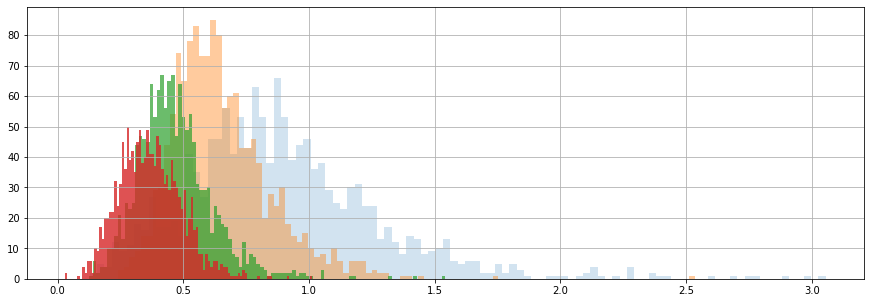

In [183]:
bicon[bicon['Depth'] == '0-10']['Carbon(%)'].hist(bins=100, figsize=(15,5), alpha=0.2)
bicon[bicon['Depth'] == '10-20']['Carbon(%)'].hist(bins=100, figsize=(15,5), alpha=0.4)
bicon[bicon['Depth'] == '20-40']['Carbon(%)'].hist(bins=100, figsize=(15,5), alpha=0.7)
bicon[bicon['Depth'] == '40-60']['Carbon(%)'].hist(bins=100, figsize=(15,5), alpha=0.8)